## Calzada Jasso Andres Geovani *<span style = "color : Blue" > 23265539 </span>*

### **Practica 4** *<span style = "color : #E3182E" >Tarea de clasificación</span>*

El hundimiento del Titanic es uno de los naufragios más infames de la historia.

El 15 de abril de 1912, durante su viaje inaugural, el RMS Titanic, ampliamente considerado “insumergible”, se hundió después de chocar con un iceberg. Desafortunadamente, no había suficientes botes salvavidas para todos a bordo, lo que provocó la muerte de 1.502 de los 2.224 pasajeros y tripulantes.

Si bien hubo algún elemento de suerte involucrado en la supervivencia, parece que algunos grupos de personas tenían más probabilidades de sobrevivir que otros

<img src=https://i.blogs.es/4a9cb1/titanic/840_560.jpeg>




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, accuracy_score)
import statsmodels.api as sm
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import mutual_info_classif
import warnings
warnings.simplefilter("ignore")
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Cargamos nuestro DataSet y se lo asignamos a la variable df
df = pd.read_csv('full.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


Como se puede observar, nuestra varibale de clase en este caso se encuentra en la segunda posicion de nuestro DataFrame, por lo que es necesario acomodarla al final para poder tener una mejor estructura de los datos.

In [3]:
#Vamos a proceder a colocar nuestra clase al final de nuestro DataFrame 
column = df.pop('Survived')
df.insert(20, 'Survived', column)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  WikiId       1304 non-null   float64
 12  Name_wiki    1304 non-null   object 
 13  Age_wiki     1302 non-null   float64
 14  Hometown     1304 non-null   object 
 15  Boarded      1304 non-null   object 
 16  Destination  1304 non-null   object 
 17  Lifeboat     502 non-null    object 
 18  Body         130 non-null    object 
 19  Class 

Algo que podemos observar es que nuestro DataFrame se encuentra con valores nulos (NAN), por lo que el siguiente paso es eliminar estos valores.

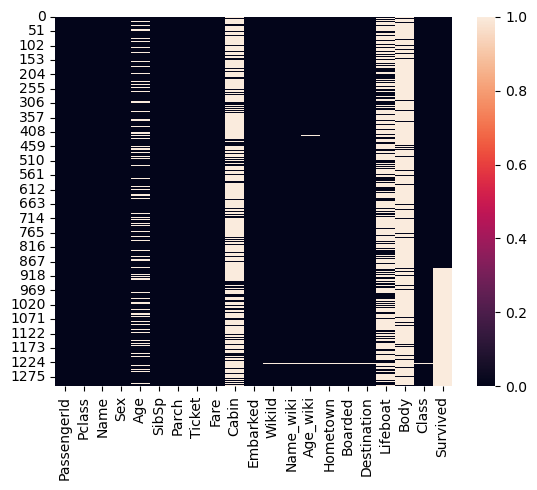

In [4]:
sns.heatmap(df.isna());

In [5]:
#Eliminamos los datos nulos 
df = df.fillna(0)

#Procedemos a ver la información y conocer si efectivamente se eliminaron estos datos 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        1309 non-null   object 
 10  Embarked     1309 non-null   object 
 11  WikiId       1309 non-null   float64
 12  Name_wiki    1309 non-null   object 
 13  Age_wiki     1309 non-null   float64
 14  Hometown     1309 non-null   object 
 15  Boarded      1309 non-null   object 
 16  Destination  1309 non-null   object 
 17  Lifeboat     1309 non-null   object 
 18  Body         1309 non-null   object 
 19  Class 

#### **Observación**

Una observación con respecto a este DataFrame es que las columnas que contengan nombres en este caso para nosotros no es algo relevante
ya que no es un factor para determinar si las personas sobrevivieron o no, por lo que vamos a proceder a eliminarla 

In [6]:
#Eliminamos los atributos que tienen menos importancia por medio de la función .drop
df = df.drop(['Name', 'Ticket', 'Name_wiki','Hometown', 'Boarded', 'Destination', 'Sex','Cabin','Embarked','Lifeboat','Body'], axis = 1)

In [7]:
#Mostramos nuestro DataFrame como tipo encabezado 
df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class,Survived
0,1,3,22.0,1,0,7.2500,691.0,22.0,3.0,0.0
1,2,1,38.0,1,0,71.2833,90.0,35.0,1.0,1.0
2,3,3,26.0,0,0,7.9250,865.0,26.0,3.0,1.0
3,4,1,35.0,1,0,53.1000,127.0,35.0,1.0,1.0
4,5,3,35.0,0,0,8.0500,627.0,35.0,3.0,0.0


###### *Asignamos nuestros datos de entrenamiento a la varible X_train y nuestra Variable de clase a y_train*

In [8]:
X_train = df[['PassengerId', 'Pclass', 'Age', 'SibSp','Parch','Fare','WikiId','Age_wiki','Class']]
y_train = df[['Survived']]

#### **<span style="color:Blue">Primer objetivo</span>.**

###### construir y evaluar n modelos de clasificación y comparar

#### **<span style="color:purple">Árboles de decisión</span>.**

In [9]:
clasificador1 = DecisionTreeClassifier(max_depth=5, random_state=42)

In [10]:
#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clasificador1, X_train, y_train, cv=10)

#confusion matrix
cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

TN, FP, FN, TP = confusion_matrix(y_train, y_pred, labels=[0, 1]).ravel()

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

print('Sensitivity: ', TPR)
print('Specificity: ', TNR)


Confusion Matrix : 
 [[642 325]
 [207 135]]
Test accuracy =  0.5935828877005348
Sensitivity:  0.39473684210526316
Specificity:  0.6639089968976215


#### **<span style="color:purple">Naive Bayes</span>.**

In [11]:
clasificador2 = GaussianNB()

In [12]:
#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clasificador2, X_train, y_train, cv=10)

cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

TN, FP, FN, TP = confusion_matrix(y_train, y_pred, labels=[0, 1]).ravel()

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

print('Sensitivity: ', TPR)
print('Specificity: ', TNR)


Confusion Matrix : 
 [[804 163]
 [185 157]]
Test accuracy =  0.73414820473644
Sensitivity:  0.4590643274853801
Specificity:  0.8314374353671148


#### **<span style="color:purple">kNN</span>.**

In [13]:
clasificador3 = KNeighborsClassifier(3)

In [14]:
#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clasificador3, X_train, y_train, cv=10)
cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

TN, FP, FN, TP = confusion_matrix(y_train, y_pred, labels=[0, 1]).ravel()

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

print('Sensitivity: ', TPR)
print('Specificity: ', TNR)


Confusion Matrix : 
 [[560 407]
 [237 105]]
Test accuracy =  0.5080213903743316
Sensitivity:  0.30701754385964913
Specificity:  0.5791106514994829


#### **<span style="color:purple">SVM</span>.**

In [15]:
clasificador4 = SVC(kernel="linear", C=0.025, random_state=42)

In [16]:
#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clasificador4, X_train, y_train, cv=10)
cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

TN, FP, FN, TP = confusion_matrix(y_train, y_pred, labels=[0, 1]).ravel()

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

print('Sensitivity: ', TPR)
print('Specificity: ', TNR)

Confusion Matrix : 
 [[868  99]
 [262  80]]
Test accuracy =  0.7242169595110771
Sensitivity:  0.23391812865497075
Specificity:  0.8976215098241985


#### **<span style="color:purple">Análisis de Discriminante</span>.**

In [17]:
clasificador5 = QuadraticDiscriminantAnalysis()

In [18]:
#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clasificador5, X_train, y_train, cv=10)
cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

TN, FP, FN, TP = confusion_matrix(y_train, y_pred, labels=[0, 1]).ravel()

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

print('Sensitivity: ', TPR)
print('Specificity: ', TNR)

Confusion Matrix : 
 [[859 108]
 [214 128]]
Test accuracy =  0.7540106951871658
Sensitivity:  0.3742690058479532
Specificity:  0.8883143743536711


#### **<span style="color:purple">AdaBoost</span>.**

In [19]:
 clasificador6 = AdaBoostClassifier(random_state=42)

In [20]:
#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clasificador6, X_train, y_train, cv=10)
cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

TN, FP, FN, TP = confusion_matrix(y_train, y_pred, labels=[0, 1]).ravel()

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

print('Sensitivity: ', TPR)
print('Specificity: ', TNR)

Confusion Matrix : 
 [[478 489]
 [242 100]]
Test accuracy =  0.44155844155844154
Sensitivity:  0.29239766081871343
Specificity:  0.49431230610134436


#### **<span style="color:purple">RBF SVM</span>.**

In [21]:
clasificador7 = SVC(gamma=2, C=1, random_state=42)

In [22]:
#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clasificador7, X_train, y_train, cv=10)
cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

TN, FP, FN, TP = confusion_matrix(y_train, y_pred, labels=[0, 1]).ravel()

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

print('Sensitivity: ', TPR)
print('Specificity: ', TNR)

Confusion Matrix : 
 [[967   0]
 [342   0]]
Test accuracy =  0.7387318563789153
Sensitivity:  0.0
Specificity:  1.0


#### **<span style="color:purple">Random Forest</span>.**

In [23]:
clasificador8 = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42)

In [24]:
#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clasificador8, X_train, y_train, cv=10)
cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

TN, FP, FN, TP = confusion_matrix(y_train, y_pred, labels=[0, 1]).ravel()

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

print('Sensitivity: ', TPR)
print('Specificity: ', TNR)

Confusion Matrix : 
 [[917  50]
 [253  89]]
Test accuracy =  0.7685255920550038
Sensitivity:  0.260233918128655
Specificity:  0.9482936918304034


#### **<span style="color:purple">Neural Net</span>.**

In [25]:
clasificador9 = MLPClassifier(alpha=1, max_iter=1000, random_state=42)

In [26]:
#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clasificador9, X_train, y_train, cv=10)
cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

TN, FP, FN, TP = confusion_matrix(y_train, y_pred, labels=[0, 1]).ravel()

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

print('Sensitivity: ', TPR)
print('Specificity: ', TNR)

Confusion Matrix : 
 [[784 183]
 [226 116]]
Test accuracy =  0.6875477463712758
Sensitivity:  0.3391812865497076
Specificity:  0.8107549120992761


#### **<span style="color:purple">Gaussian Process</span>.**

In [27]:
clasificador10 = GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42)

In [28]:
#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clasificador10, X_train, y_train, cv=10)
cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

TN, FP, FN, TP = confusion_matrix(y_train, y_pred, labels=[0, 1]).ravel()

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

print('Sensitivity: ', TPR)
print('Specificity: ', TNR)

Confusion Matrix : 
 [[815 152]
 [316  26]]
Test accuracy =  0.6424751718869366
Sensitivity:  0.07602339181286549
Specificity:  0.8428128231644261


#### **<span style="color:orange">Resultados de los clasificadores</span>.**

La siguiente tabla nos muestra el resultado de evaluar los 10 clasificadores de nuestro DataFrame con los datos originales, como podemos observar los resultados no son muy favorables, pero de los clasificadores probados en este código el que nos proporciona un mejor resultado es RandomForest (resaltado con color azul).

Por lo que para sa sunfa parte usaremos RandomForest junto con reducción de dimensionalidad para observar si existen cambios favorables.


| Clasificador | Accuracy | Sensitivity |Specificity|
|----------|----------|----------|--------|
| Árbol de desición    | 0.59   | 0.39   | 0.66   |
| Naive Bayes   | 0.73   | 0.45   | 0.83  |
| KNN    | 0.50   | 0.30   | 0.57  |
|SVM     | 0.72 | 0.23 | 0.89|
|Análisis de discriminante | 0.75 | 0.37 | 0.88 |
| AdaBoost | 0.44 | 0.29 | 0.49| 
| RBF SVM | 0.73 | 0.0| 1.0|
|[Random Forest](dot.com)  | [0.76](dot.com) | [0.26](dot.com) | [0.94](dot.com)|
| Neural Net| 0.68| 0.33| 0.81|
|Gaussian Process| 0.64| 0.07| 0.84|

#### **<span style="color:Blue">Segundo objetivo</span>.**

###### Comparar el rendimiento de los modelos utilizando los datos en su dominio original, respecto al utilizar los datos en un espacio modificado (e.g. PCA, LDA, t-SNE, UMAP, ...).

Comenzamos la segunda etapa de esta práctica observando la ganancia de información de cada atributo con respecto a la clase de clasificación. 

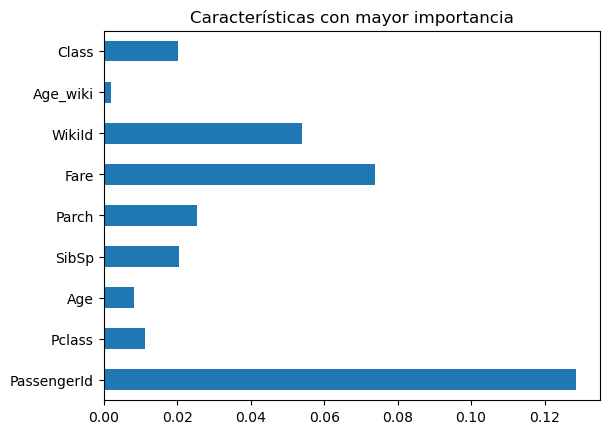

In [29]:
X_nueva = mutual_info_classif(X_train, y_train)
feat_imp = pd.Series(X_nueva, df.columns[0:len(df.columns)-1])
feat_imp.plot(title="Características con mayor importancia", kind='barh')
plt.show()

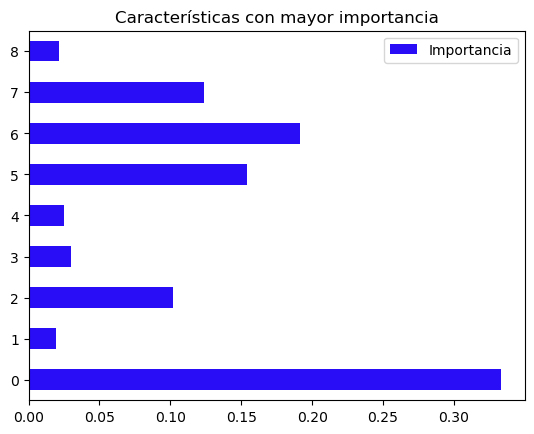

In [30]:
#Ahora usamos la función de RandomForestClassifier para conocer cuales son los atributos que tienen una mayor importancia 

model = RandomForestClassifier(n_estimators=340)
model.fit(X_train,y_train)
importances = model.feature_importances_

feat_df = pd.DataFrame({"Features": pd.DataFrame(X_train).columns, "Importancia": importances})
feat_df.set_index('Importancia')
feat_df.plot.barh(title="Características con mayor importancia" ,color = '#290DF7');

Donde es facil observar que los atributos que tiene mayor importancia en nuestro DataFrame es:
1. Passerngerid
2. Fare
3. Wikiid
4. Parch 


In [31]:
#Importamos los reductores de dimensionalidad PCA TSNE Y UMAP
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP


### **<span style="color:purple">Usando Random Forest</span>.**

#### Como el clasificador Random Forest nos dio el mejor resultado en la primera parte, usaremos este clasificador con el etapa de reducción de dimensionalidad para:
1. PCA
2. TSNE
3. UMAP

Cabe mencionar que lo primero que haremos sera usar estos tres reductores de dimensionalidad con los atributos originales usando el clasificador Random Forest. Ya que queremos visualizar si los atributos originales nos generan un cambio significativo.

In [32]:
clasificador = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42)

##### **<span style="color:purple">PCA</span>.**

In [33]:
X_PCA = PCA(n_components=2).fit_transform(X_train)
#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clasificador, X_PCA, y_train, cv=10)
cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

TN, FP, FN, TP = confusion_matrix(y_train, y_pred, labels=[0, 1]).ravel()

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

print('Sensitivity: ', TPR)
print('Specificity: ', TNR)

Confusion Matrix : 
 [[786 181]
 [205 137]]
Test accuracy =  0.7051184110007639
Sensitivity:  0.40058479532163743
Specificity:  0.81282316442606


##### **<span style="color:purple">TSNE</span>.**

In [34]:
X_TSNE = TSNE().fit_transform(X_train) 
#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clasificador, X_TSNE, y_train, cv=10)
cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

TN, FP, FN, TP = confusion_matrix(y_train, y_pred, labels=[0, 1]).ravel()

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

print('Sensitivity: ', TPR)
print('Specificity: ', TNR)

Confusion Matrix : 
 [[803 164]
 [238 104]]
Test accuracy =  0.6928953399541635
Sensitivity:  0.30409356725146197
Specificity:  0.8304033092037229


##### **<span style="color:purple">UMAP</span>.**

In [ ]:
X_UMAP = UMAP(n_neighbors=2, min_dist=0.1, metric='correlation').fit_transform(X_train)
#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clasificador, X_UMAP, y_train, cv=10)
cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

TN, FP, FN, TP = confusion_matrix(y_train, y_pred, labels=[0, 1]).ravel()

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

print('Sensitivity: ', TPR)
print('Specificity: ', TNR)

##### **<span style="color:Orange">Resultados con los atributos originales usando Random Forest</span>.**

Una vez que usamos reducción de dimensionalidad con los datos originales y el clasificador RandomForest. Se genera la siguiente tabla la cual nos propirciona la información de como fue el desempeño de usar nuestro clasificador y  reducción de dimensionalidad. Estos datos nos pueden servir para hacer una comparación justa cuando se tomen los atributos con mayor importancia.


| Reductor | Accuracy | Sensitivity |Specificity|
|----------|----------|----------|--------|
| PCA    | 0.70   | 0.40   | 0.81   |
| TSNE   | 0.69   | 0.30   | 0.83  |
| UMAP    | 0.73   | 0.09   | 0.95  |


Una vez que observamos que nuestros resultados no fueron favorales con todos los atributos, vamos a elegir solamente los siguientes 
1. Passerngerid
2. Fare
3. Wikiid
4. Parch 


In [ ]:
X_train = df[['PassengerId','Parch','Fare','WikiId']]
y_train = df[['Survived']]
#Observamos el nuevo DataFrame con los atributos de maayor importancia 
X_train.head()

Ahora que tenemos nuestro nuevo DataFrame con los atributos de mayor importancia vamos a realizar los mismos pasos para obtener nuestros valores de interés.

##### **<span style="color:Blue">Llamos de nuevo a nuestro clasificador</span>.**

In [ ]:
clasificador = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42)

##### **<span style="color:purple">PCA</span>.**

In [ ]:
X_PCA = PCA(n_components=2).fit_transform(X_train)
#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clasificador, X_PCA, y_train, cv=10)
cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

TN, FP, FN, TP = confusion_matrix(y_train, y_pred, labels=[0, 1]).ravel()

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

print('Sensitivity: ', TPR)
print('Specificity: ', TNR)

##### **<span style="color:purple">TSNE</span>.**

In [ ]:
X_TSNE = TSNE().fit_transform(X_train) 
#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clasificador, X_TSNE, y_train, cv=10)
cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

TN, FP, FN, TP = confusion_matrix(y_train, y_pred, labels=[0, 1]).ravel()

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

print('Sensitivity: ', TPR)
print('Specificity: ', TNR)

##### **<span style="color:purple">UMAP</span>.**

In [ ]:
X_UMAP = UMAP(n_neighbors=2, min_dist=0.1, metric='correlation').fit_transform(X_train)
#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clasificador, X_UMAP, y_train, cv=10)
cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

TN, FP, FN, TP = confusion_matrix(y_train, y_pred, labels=[0, 1]).ravel()

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

print('Sensitivity: ', TPR)
print('Specificity: ', TNR)

##### **<span style="color:Orange">Resultados con los atributos reducidos usando Random Forest</span>.**

Como podemos observar, los resultados de tener los datos originales y de aplicar reducción de dimensionalidad en este caso no nos genero un cambio significativo, por lo que vamos a proceder a eliminar más atributos para observar si hay un mejor cambio.

| Reductor | Accuracy | Sensitivity |Specificity|
|----------|----------|----------|--------|
| PCA    | 0.70   | 0.41   | 0.81   |
| TSNE   | 0.69   | 0.29   | 0.84  |
| UMAP    | 0.73   | 0.07   | 0.97  |

Una vez que observamos que nuestros resultados no fueron favorales con todos los siguientes atributos: 
1. Passerngerid
2. Fare
3. Wikiid
4. Parch 

Vamos a proceder a realizar una nueva selección de atributos basandonos en el gráfico de barras "Características con mayor importancia" del cual vamos a elegir los siguientes atributos:
1. Fare
2. Wikiid

Y nos vamos a arriesgar a eliminar el atributo que tiene mayor importancia que es:
###### *Passerngerid*


In [ ]:
X_train = df[['Fare','WikiId']]
y_train = df[['Survived']]
#Observamos el nuevo DataFrame con los atributos de maayor importancia 
X_train.head()

##### **<span style="color:purple">PCA</span>.**

In [ ]:
X_PCA = PCA(n_components=2).fit_transform(X_train)
#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clasificador, X_PCA, y_train, cv=10)
cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

TN, FP, FN, TP = confusion_matrix(y_train, y_pred, labels=[0, 1]).ravel()

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

print('Sensitivity: ', TPR)
print('Specificity: ', TNR)

##### **<span style="color:purple">TSNE</span>.**

In [ ]:
X_TSNE = TSNE().fit_transform(X_train) 
#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clasificador, X_TSNE, y_train, cv=10)
cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

TN, FP, FN, TP = confusion_matrix(y_train, y_pred, labels=[0, 1]).ravel()

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

print('Sensitivity: ', TPR)
print('Specificity: ', TNR)

##### **<span style="color:purple">UMAP</span>.**

In [ ]:
X_UMAP = UMAP(n_neighbors=2, min_dist=0.1, metric='correlation').fit_transform(X_train)
#Realizamos la predicción por medio de la validación cruzada con k=10
y_pred = cross_val_predict(clasificador, X_UMAP, y_train, cv=10)
cm = confusion_matrix(y_train, y_pred) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_pred))

TN, FP, FN, TP = confusion_matrix(y_train, y_pred, labels=[0, 1]).ravel()

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

print('Sensitivity: ', TPR)
print('Specificity: ', TNR)

##### **<span style="color:Orange">Resultados obtenidos solamente con Fare y WikiId usando Random Forest</span>.**

Sorpresivamente al solamente quedarnos con dos de los atributos con mayor importancia del DataFrame, podemos observar que nuestros resultados tuvieron mejoría, incluso al eliminar el atributo de mayor importancia segun nuestra reducción de atributos. 

| Reductor | Accuracy | Sensitivity |Specificity|
|----------|----------|----------|--------|
| PCA    | 0.73   | 0.15   | 0.94   |
| TSNE   | 0.74   | 0.18   | 0.94  |
| UMAP    | 0.74   | 0.06   | 0.98  |

## **<span style="color:Blue">Conclusión</span>.**

En esta práctica, se evaluó el comportamiento de diferentes clasificadores en el conjunto de datos del Titanic. Se encontró que, al procesar los datos, se genera un tipo de comportamiento. Sin embargo, al aplicar reducción de dimensionalidad, este comportamiento puede ser similar al que se obtiene con los datos originales. Además, se observó que el clasificador RandomForest y la reducción de dimensionalidad con PCA, TSNE y UMAP tienen un mejor desempeño al elegir los datos más importantes incluso eliminando el que parece ser el atributo más importante.

Es interesante notar que, al eliminar el atributo que parece ser el más importante, se observa un mejor desempeño del clasificador. Esto puede deberse a que este atributo, PassengerId, tiene una gran cantidad de valores faltantes. Al eliminar estos valores, todo el peso se asigna a los valores reemplazados con cero. Por lo tanto, es posible que este atributo no sea tan relevante para la predicción.